## Student : Diyorbek Majidov
## Student ID: 2110125
## Group: JSE5


### 1-task: Malware Detection 

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

In [78]:
data = pd.read_csv('android_traffic.csv')

In [108]:

from sklearn.preprocessing import StandardScaler
df_model = data.copy()

scaler = StandardScaler()
features = [['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
    
knn = KNeighborsClassifier()
x = df_model.drop(columns=['type'])
y = df_model['type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=60)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print(accuracy_score(y_test, y_pred))


0.8636073932441045


In [104]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)


SVC()

In [105]:
svm_pred = svm.predict(x_test)
print('SVM accuracy:', accuracy_score(y_test, svm_pred))

SVM accuracy: 0.7023581899298916


#### The SVM model has demonstrated inferior performance compared to the KNN model. The accuracy of the SVM model is 0.70, whereas the KNN model achieves a higher accuracy of 0.86. These results indicate that the KNN model outperforms the SVM model, indicating its superiority in this particular scenario.

In [66]:
import numpy as np
from sklearn.model_selection import KFold


kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(x_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 2}


### Once the optimal value for k is determined, it will be employed to calculate the accuracy of the model.

In [109]:

from sklearn.preprocessing import StandardScaler


df_model = data.copy()
scaler = StandardScaler()
features = [['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

knn = KNeighborsClassifier(n_neighbors=2)

x = df_model.drop(columns=['type'])
y = df_model['type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=60)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print(accuracy_score(y_test, y_pred))


0.8731676226896112


#### By setting the value of n_neighbors to 2, which we identified as the optimal choice for k, we managed to enhance the model's accuracy from 86% to 87%.

## 2-task: Clustering with K-means

In [117]:
data = pd.read_csv('digits_small.csv')

In [118]:
print(data.dtypes)

print(data.isnull().sum())

Feature_1    float64
Feature_2    float64
Feature_3      int64
dtype: object
Feature_1    0
Feature_2    0
Feature_3    0
dtype: int64


In [119]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

/opt/anaconda3/envs/lab5/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/lab5/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/lab5/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/lab5/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

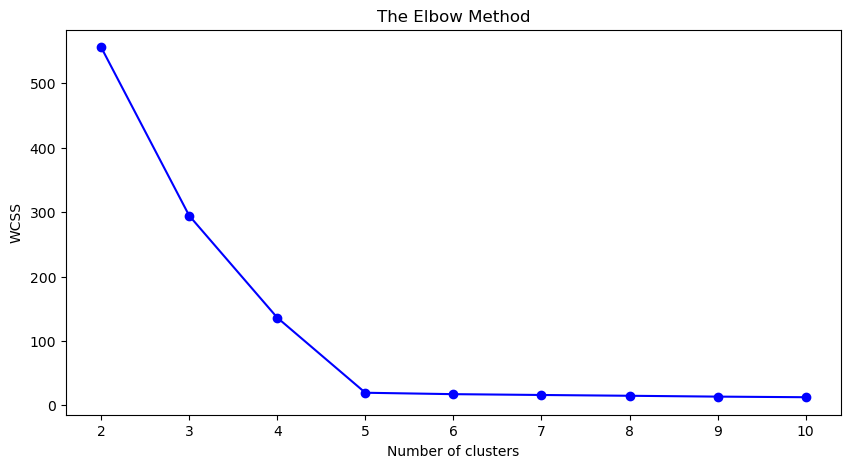

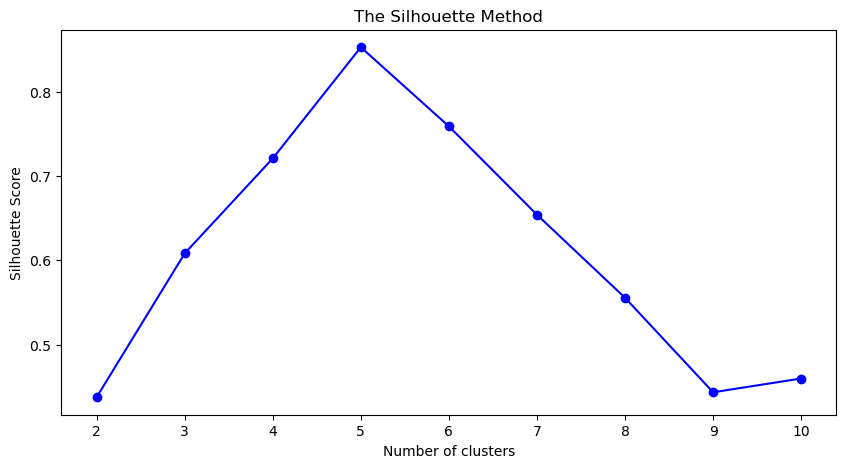

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = list(range(2,11))

wcss = []
sil_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)
    
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    sil_scores.append(silhouette_avg)
    
    wcss.append(clusterer.inertia_)

plt.figure(figsize=(10,5))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.plot(range_n_clusters, wcss, 'bo-', color='blue')

plt.figure(figsize=(10,5))
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.plot(range_n_clusters, sil_scores, 'bo-', color='blue')
plt.show()

## 3-task: Theoretical Question On Ridge Regression 

#### Based on the given information and the equation provided:(A) Neither --> The prediction rule represented by dashed line (A) could not be produced by ridge regression. Ridge regression introduces a regularization term that helps control model complexity, but it does not directly affect the slope of the line. Therefore, the slope of dashed line (A) cannot be attributed to ridge regression with either high or low regularization.(B) High λ --> The prediction rule represented by dashed line (B) could be produced by ridge regression with a high value of λ. A higher value of λ would introduce stronger regularization, resulting in a flatter slope for the line, which aligns with the prediction rule shown.(C) Low λ --> The prediction rule represented by dashed line (C) could be produced by ridge regression with a low value of λ. A lower value of λ would yield weaker regularization, allowing the line to have a steeper slope, which is consistent with the prediction rule depicted.(D) Neither --> The prediction rule represented by dashed line (D) could not be produced by ridge regression. The shape and slope of the line do not correspond to the behavior typically observed in ridge regression, regardless of the value of λ.Keep in mind that these assessments are made based on the information provided and assuming that the dashed lines are linear prediction rules derived from ridge regression with varying values of λ. 